# 대중교통 데이터 시각화하기

---
## 대중교통 데이터 내려받기
[티머니 홈페이지](https://pay.tmoney.co.kr/index.dev) > 이용안내 > 대중교통 통계자료    
2019. 01월 통계자료 이용

## 지하철 유무임별 이용현황

In [1]:
d_pth='../data/subwayfee.csv'

In [2]:
# 숫자에 쉼표를 제거하고, '작업일시' 컬럼을 제거
import csv

with open('../data/new_subwayfee.csv','w',newline='') as w:
    f=open(d_pth,'r')
    data=csv.reader(f)
    wr=csv.writer(w)
    header=next(data)[:-1]
    wr.writerow(header)
    for row in data:
        del row[-1]
        row[4:]=[r.replace(',','') for r in row[4:]]
        wr.writerow(row)
    f.close()

In [3]:
# 전처리 확인
import csv

d_pth='../data/new_subwayfee.csv'
f=open(d_pth,'r')
data=csv.reader(f)
n=0
for row in data:
    print(row)
    n+=1
    if n==19:
        print('...생략...')
        break
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '0150', '서울역', '1516452', '1400464', '221180', '211764']
['2019-01', '1호선', '0151', '시청', '676932', '676266', '102388', '101033']
['2019-01', '1호선', '0152', '종각', '1240810', '1177643', '162410', '152062']
['2019-01', '1호선', '0153', '종로3가', '703110', '674148', '387062', '362735']
['2019-01', '1호선', '0154', '종로5가', '571824', '583955', '275447', '263687']
['2019-01', '1호선', '0155', '동대문', '308301', '342898', '134071', '138633']
['2019-01', '1호선', '0156', '신설동', '360561', '353834', '126466', '120147']
['2019-01', '1호선', '0157', '제기동', '293540', '288217', '374571', '400607']
['2019-01', '1호선', '0158', '청량리(서울시립대입구)', '463456', '482960', '352121', '357571']
['2019-01', '1호선', '0159', '동묘앞', '174683', '188711', '146034', '147551']
['2019-01', '2호선', '0201', '시청', '706097', '679503', '61058', '55387']
['2019-01', '2호선', '0202', '을지로입구', '1415414', '1414980', '120425', '111592']
['2019-01', '2호선', '0203', '을지로3가', 

## 유임승차 비율이 가장 높은 역 찾기

* 유임승차 비율 : 유임승차인원 / 무인승차인원

In [4]:
d_pth='../data/new_subwayfee.csv'
f=open(d_pth,'r')
data=csv.reader(f)
header=next(data)
max_rate=0
max_station=[]
for row in data:
    if int(row[6])!=0:
        if int(row[4])/int(row[6])>max_rate:
            max_rate=int(row[4])/int(row[6])
            max_station=row
print(header)
print(max_station)                                   
print(' 유임승차 비율은 ',max_rate,'로 가장 높았다.')
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '3호선', '0321', '충무로', '55', '0', '2', '0']
 유임승차 비율은  27.5 로 가장 높았다.


In [5]:
# 유임 승하차가 0임. 환승역이어서 3,4호선 데이터를 함께 처리해야 한다.

# 변경할 코드
## 유무임 승차 인원이 10만명 이상인 경우 계산하기
## rate : 유임승차인원 / 유임+무임 인원

f=open(d_pth,'r')
data=csv.reader(f)
header=next(data)
max_rate=0
max_station=[]
for row in data:
    if int(row[6])!=0 and int(row[4])+int(row[6])>100000:
        if int(row[4])/(int(row[4])+int(row[6]))>max_rate:
            max_rate=int(row[4])/(int(row[4])+int(row[6]))
            max_station=row
print(header)
print(max_station)                                   
print(' 유임승차 비율은 ',round(max_rate,2),'로 가장 높았다.')
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '2호선', '0239', '홍대입구', '2351935', '2507561', '114832', '111488']
 유임승차 비율은  0.95 로 가장 높았다.


In [6]:
# 유임승차 인원 비율이 0.94 이상인 경우 모두 출력하기
f=open(d_pth,'r')
data=csv.reader(f)
header=next(data)
max_rate=0
max_station=[]
for row in data:
    if int(row[6])!=0 and int(row[4])+int(row[6])>100000:
        if int(row[4])/(int(row[4])+int(row[6]))>0.94:
            print(row[1], row[3],round(int(row[4])/(int(row[4])+int(row[6])),2))
f.close()

2호선 강남 0.94
2호선 홍대입구 0.95
경부선 서울역 0.95
9호선 신논현 0.94
공항철도 1호선 홍대입구 0.95
공항철도 1호선 마곡나루 0.94
공항철도 1호선 김포공항 0.94
공항철도 1호선 청라국제도시 0.95


## 유무임 승하차 인원이 가장 많은 역 찾기

In [7]:
d_pth='../data/new_subwayfee.csv'
f=open(d_pth,'r')
data=csv.reader(f)
header=next(data)
max_rate=[0]*4
max_station=['']*4
for row in data:
    for i in range(4,8):
        if int(row[i])>int(max_rate[i-4]):
            max_rate[i-4]=row[i]
            max_station[i-4]=row[3]+' '+row[1]
for i in range(4):
    print(header[4+i],' : ',max_station[i],max_rate[i])
f.close()

유임승차  :  강남 2호선 3153418
유임하차  :  강남 2호선 3210437
무임승차  :  종로3가 1호선 387062
무임하차  :  제기동 1호선 400607


## 모든 역의 유무임 승하차 비율

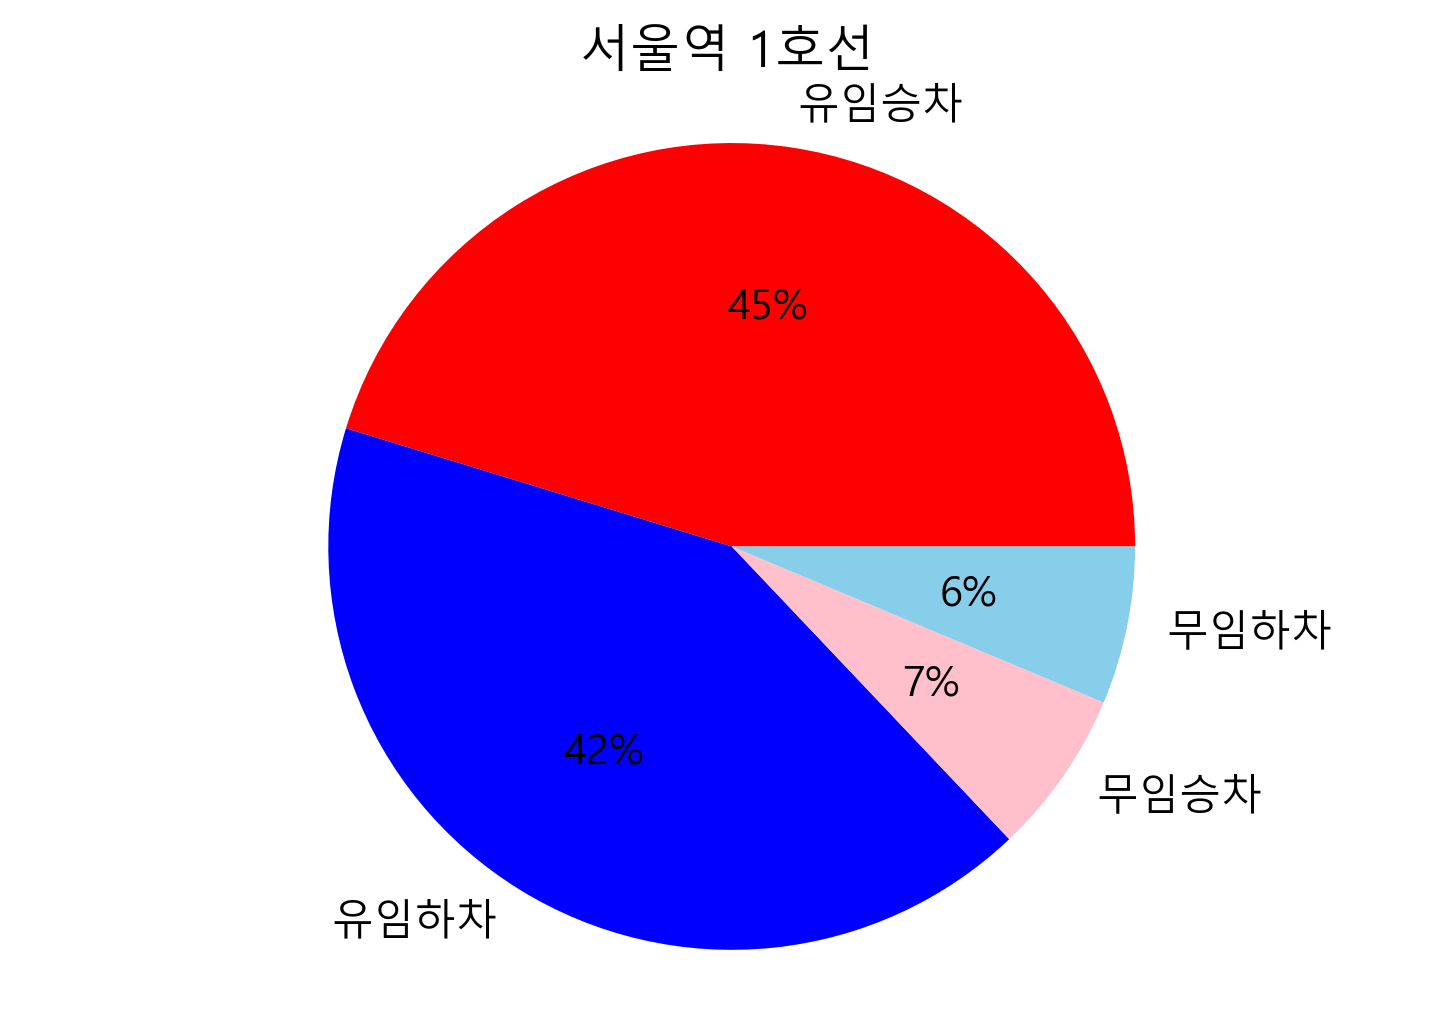

In [8]:
# 파이차트로 표현
import matplotlib.pyplot as plt

d_pth='../data/new_subwayfee.csv'
f=open(d_pth,'r')
data=csv.reader(f)
header=next(data)
label=header[4:]
c=['red','blue','pink','skyblue']
plt.rc('font',family='Malgun Gothic')
for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3]+' '+row[1])
    
    plt.pie(row[4:8],labels=label,colors=c,autopct='%1.f%%')
    plt.axis('equal')
    #plt.savefig('../data/savefig/'+row[3]+'_'+row[1]+'.png')
    plt.show()
    break
f.close()